In [1]:
%reload_ext autoreload
%autoreload 2

# Módulos propios
from utils.filefinder import getFilesFromDirectory
from imgproc.bboxes import Bbox

# Módulos de terceros
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
directory = "Gotas_01/"
list_files, list_filenames = getFilesFromDirectory(directory, ".jpg")

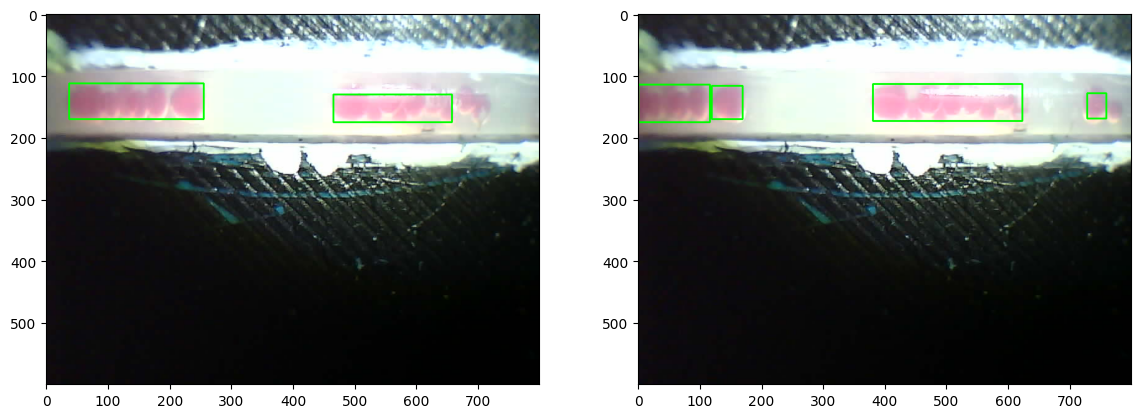

In [ ]:
index = 72

img_I = cv2.imread(list_files[index])
bboxes_I, masks_I = Bbox().getBoundingBoxesForImg(img_I,sdk=-1,minarea=250)

img_II = cv2.imread(list_files[index+1])
bboxes_II, masks_II = Bbox().getBoundingBoxesForImg(img_II,sdk=-1,minarea=250)

img_I_copy = img_I.copy()
img_II_copy = img_II.copy()

for bbox in bboxes_I:
    cv2.rectangle(img_I_copy, bbox[0], bbox[1], (0, 255, 0), 2)

for bbox in bboxes_II:
    cv2.rectangle(img_II_copy, bbox[0], bbox[1], (0, 255, 0), 2)

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(cv2.cvtColor(img_I_copy, cv2.COLOR_BGR2RGB))
ax = fig.add_subplot(1, 2, 2)
ax.imshow(cv2.cvtColor(img_II_copy, cv2.COLOR_BGR2RGB))
plt.show()


In [22]:
list_distances = []
for i in range(len(bboxes)-1):
    
    # Defino las bbox a comparar
    first_bbox = bboxes[i]
    second_bbox = bboxes[i+1]

    print(f"Comparando bbox {i} y bbox {i+1}:")
    print(f"  Bbox {i}: {first_bbox}")
    print(f"  Bbox {i+1}: {second_bbox}")

    # Calculo la distancia entre cajas
    distance = second_bbox[0][0] - first_bbox[1][0]
    
    print(f"Distancia entre bbox {i} y bbox {i+1}: {distance}")

    list_distances.append(distance)

mean_distance = np.mean(list_distances)
print(f"Distancia media entre cajas: {mean_distance}")

spacial_frequency = 1 / mean_distance if mean_distance != 0 else 0
print(f"Frecuencia espacial: {spacial_frequency}")


Comparando bbox 0 y bbox 1:
  Bbox 0: [(0, 121), (80, 167)]
  Bbox 1: [(111, 113), (255, 173)]
Distancia entre bbox 0 y bbox 1: 31
Comparando bbox 1 y bbox 2:
  Bbox 1: [(111, 113), (255, 173)]
  Bbox 2: [(448, 128), (592, 171)]
Distancia entre bbox 1 y bbox 2: 193
Comparando bbox 2 y bbox 3:
  Bbox 2: [(448, 128), (592, 171)]
  Bbox 3: [(736, 127), (800, 171)]
Distancia entre bbox 2 y bbox 3: 144
Distancia media entre cajas: 122.66666666666667
Frecuencia espacial: 0.008152173913043478
